# Arbres de décision - classification

L’objectif de ce notebook est mettre en œuvre des arbres de décision pour des problèmes de classification. Ce document reprend librement certains exemples montrés dans l’excellente documentation de scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  

Les arbres de décision sont des méthodes d’apprentissage non paramétriques utilisées pour des problèmes de classification et de régression. L’objectif est de créer un modèle qui prédit les valeurs de la variable cible, en se basant sur un ensemble de séquences de règles de décision déduites à partir des données d’apprentissage.
L’arbre approxime donc la cible par une succession de règles `if-then-else`.
Ce paradigme s’applique aussi bien à des données catégorielles qu’à des données numériques.
Plus l’arbre généré est complexe, mieux le modèle « explique » les donnés d’apprentissage mais plus le risque de sur-apprentissage (*over-fitting*) est élevé.

Les arbres de décision ont plusieurs **avantages** qui les rendent intéressants dans des contextes où il est utile de comprendre la séquence de décisions prise par le modèle :

- Ils sont simples à comprendre et à visualiser.  
- Ils nécessitent peu de préparation des données (normalisation, etc.).  
- Le coût d’utilisation des arbres est logarithmique.  
- Ils sont capables d’utiliser des données catégorielles et numériques.  
- Ils sont capables de traiter des problèmes multi-classe.  
- Modèle en boîte blanche : le résultat est facile à conceptualiser et à visualiser.  


Ces modèles présentent néanmoins deux **désavantages** majeurs :

- Sur-apprentissage :  parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (`max_depth`) et nombre minimal d’exemples par feuille (`min_samples_leaf`) permet d’éviter ce problème.  
- Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’ajuster la base de données avant la construction, pour éviter qu’une classe domine largement les autres (en termes de nombre d’exemples d’apprentissage).  

## Un exemple basique

Dans scikit-learn, la classe [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

On commence par importer les bons modules et construire l’objet arbre :

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

Pour l’exemple, nous pouvons définir un jeu de données minimaliste (deux points, chacun dans une classe) :

In [ ]:
X = [[0, 0], [1, 1]]
y = [0, 1]

L’arbre se construit à l’aide de la méthode `.fit(X, y)` :

In [ ]:
clf = clf.fit(X, y)

La prédiction sur de nouveaux échantillons se fait avec `.predict(X)` :

In [ ]:
clf.predict([[2., 2.]])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d’apprentissage dans chaque feuille) :

In [ ]:
clf.predict_proba([[2., 2.]])

## Classification des données Iris

`DecisionTreeClassifier` est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0, 1, … K-1). Dans cet exemple nous allons travailler avec la base de données [Iris](https://archive.ics.uci.edu/ml/datasets/Iris), facilement accessible dans `sklearn`. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : *Iris setosa*, *Iris virginica* ou *Iris versicolor*.

Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l’autre.


<dl style='margin: 20px 0;'>
<dt>Les attributs du jeu de données sont :</dt>
<dd>
- longueur de sépale,  
- largeur de sépale,  
- longueur de pétale,  
- largeur de pétale,  
- classe : Iris Setosa, Iris Versicolor ou Iris Virginica.  


</dd>

</dl>

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

Le jeu de données Iris étant très commun, scikit-learn propose une fonction native permettant de le charger en mémoire :

### Les données

Chargement des données

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

En utlisant la fonction bicount, afficher le nombre d'exemple de chaque classe

In [27]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale

In [28]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

### Construction et exploitation du modéle

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Prédiction

In [31]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Calculer le score en test

In [32]:
clf.score(X_test, y_test)

0.9777777777777777

### Visualisation de l'arbre

A l'aide de la méthode plot_tree, visualiser l'arbre construit

[Text(0.4, 0.9, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

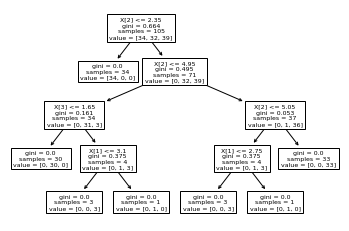

In [33]:
# A modifier
tree.plot_tree(clf)

In [34]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

Utiliser `export_graphviz` en choisissant les options qui vont bien pour visualiser l'arbre de manière "esthétique"

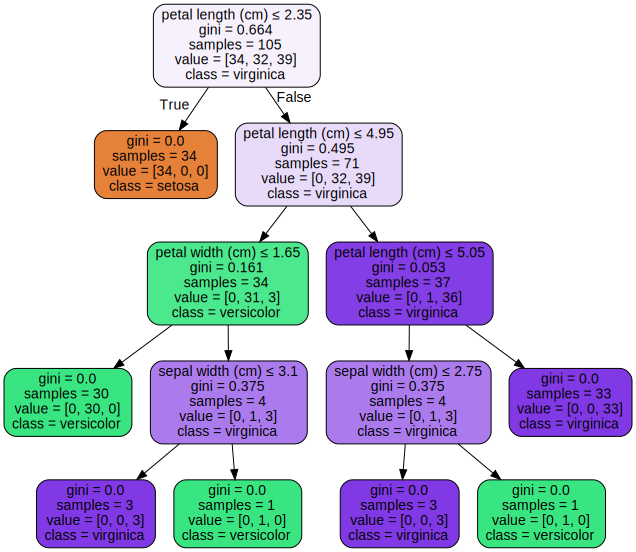

In [35]:
# A modifier
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

L'arbre peut aussi être visualiser sous forme de texte en utlisant le fonction `export_text`

In [36]:

from sklearn.tree import export_text

#utiliser ici la fonction export_text pour visualiser l'arbre sous forme de texte
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- sepal width (cm) <= 2.75
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  2.75
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: 2



### Prédiction

In [37]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

On peut de cette façon calculer le score en test :

In [38]:
clf.score(X_test, y_test)

0.9777777777777777

### Visualisation par paires (cf TP Data)

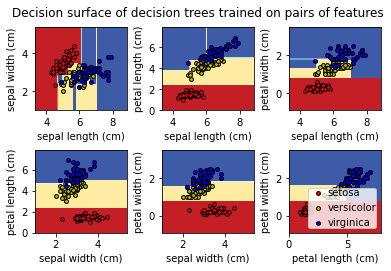

In [40]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### Quelques questions (facultatives)


Changez les valeurs de parametres `max_depth` et `min_samples_leaf`. Que constatez-vous ?

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec `GridSearchCV`) les valeurs des paramètres `max_depth` et `min_samples_leaf` pour mesurer leur impact sur ce score.